# Integrantes
Diana Claudia Maya Santes

Miguel Angel Domínguez Mendoza

Cesar Jair Tamez Juárez

 Librerias

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization, Activation, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
import numpy as np
import os
import cv2
from skimage import io, color
from skimage.color import rgb2gray
import math
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from tensorflow.keras.models import load_model
from PIL import Image, ImageFilter
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Definimos la ruta en donde se encuentran las imágenes

In [ ]:
ubicacion= 'C:/Users/Blue/Documents/MCD/ProcesamientodeDatos/DatosSeñas/Train/A'
contenido1 = os.listdir(ubicacion)
len(contenido1)

1126

In [ ]:
file_path2= ubicacion + "/" + contenido1[0]
img_gs = cv2.imread(file_path2)

In [ ]:
contenido1[1]

'10021_A.jpg'

Mostramos una de las imágenes del conjunto

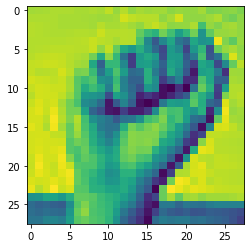

In [ ]:
with Image.open(file_path2) as img:
    img.load()

type(img)
    
isinstance(img, Image.Image)

img= np.array(img)
imgplot = plt.imshow(img)
plt.show()

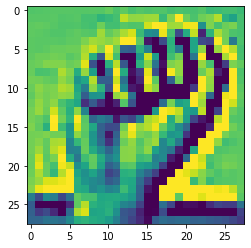

In [ ]:
imgplot = plt.imshow(edge_enhance)
plt.show()

Definimos la siguiente función para transformar las imágenes utilizando los siguientes filtros


1.   Find Edges
2.   Sharpen
3.   Smooth
4.   Edge Enhance





In [ ]:
def preproceso(ubicacion):
    imagenes=[]
    letra= []
    contenido1 = os.listdir(ubicacion)
    for i in range(len(contenido1)):
        file_path1= ubicacion + "/" + contenido1[i]
        contenido2 = os.listdir(file_path1)
        for j in range(len(contenido2)):
            file_path2= file_path1 + "/" + contenido2[j]
            with Image.open(file_path2) as img:
                img.load()
            type(img)
            isinstance(img, Image.Image)
            img_gray = img.convert("L")
            edges = img_gray.filter(ImageFilter.FIND_EDGES)
            sharp_img = img_gray.filter(ImageFilter.SHARPEN)
            img_gray_smooth = sharp_img.filter(ImageFilter.SMOOTH)
            edge_enhance = img_gray_smooth.filter(ImageFilter.EDGE_ENHANCE)
            img_gs= np.array(edge_enhance)
            imagenes.append(img_gs)
            letra.append(contenido1[i])
    return imagenes, letra

In [ ]:
ubicacion1= 'C:/Users/Blue/Documents/MCD/ProcesamientodeDatos/DatosSeñas/Train'
ubicacion2= 'C:/Users/Blue/Documents/MCD/ProcesamientodeDatos/DatosSeñas/Test'

Datos= preproceso(ubicacion1)
DatosT= preproceso(ubicacion2)

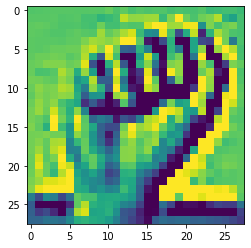

In [ ]:
imgplot = plt.imshow(Datos[0][0])
plt.show()

In [ ]:
Datos[1][3000]

'C'

Datos de entreamiento

In [ ]:
x= np.array(Datos[0])
Yy_train= Datos[1]
y=[]
for i in range(len(Yy_train)):
    if Yy_train[i]=='A':
        y.append([0])
    elif Yy_train[i]=='B':
        y.append([1])
    elif Yy_train[i]=='C':
        y.append([2])
    elif Yy_train[i]=='D':
        y.append([3])
    elif Yy_train[i]=='E':
        y.append([4])
    elif Yy_train[i]=='F':
        y.append([5])
    elif Yy_train[i]=='G':
        y.append([6])
    elif Yy_train[i]=='H':
        y.append([7])
    elif Yy_train[i]=='I':
        y.append([8])
    elif Yy_train[i]=='K':
        y.append([9])
    elif Yy_train[i]=='L':
        y.append([10])
    elif Yy_train[i]=='M':
        y.append([11])
    elif Yy_train[i]=='N':
        y.append([12])
    elif Yy_train[i]=='O':
        y.append([13])
    elif Yy_train[i]=='P':
        y.append([14])
    elif Yy_train[i]=='Q':
        y.append([15])
    elif Yy_train[i]=='R':
        y.append([16])
    elif Yy_train[i]=='S':
        y.append([17])
    elif Yy_train[i]=='T':
        y.append([18])
    elif Yy_train[i]=='U':
        y.append([19])
    elif Yy_train[i]=='V':
        y.append([20])
    elif Yy_train[i]=='W':
        y.append([21])
    elif Yy_train[i]=='X':
        y.append([22])
    else:
        y.append([23])

y_train= y

Datos de testeo

In [ ]:
x_test= np.array(DatosT[0])
Yy_train= DatosT[1]
y=[]
for i in range(len(Yy_train)):
    if Yy_train[i]=='A':
        y.append([0])
    elif Yy_train[i]=='B':
        y.append([1])
    elif Yy_train[i]=='C':
        y.append([2])
    elif Yy_train[i]=='D':
        y.append([3])
    elif Yy_train[i]=='E':
        y.append([4])
    elif Yy_train[i]=='F':
        y.append([5])
    elif Yy_train[i]=='G':
        y.append([6])
    elif Yy_train[i]=='H':
        y.append([7])
    elif Yy_train[i]=='I':
        y.append([8])
    elif Yy_train[i]=='K':
        y.append([9])
    elif Yy_train[i]=='L':
        y.append([10])
    elif Yy_train[i]=='M':
        y.append([11])
    elif Yy_train[i]=='N':
        y.append([12])
    elif Yy_train[i]=='O':
        y.append([13])
    elif Yy_train[i]=='P':
        y.append([14])
    elif Yy_train[i]=='Q':
        y.append([15])
    elif Yy_train[i]=='R':
        y.append([16])
    elif Yy_train[i]=='S':
        y.append([17])
    elif Yy_train[i]=='T':
        y.append([18])
    elif Yy_train[i]=='U':
        y.append([19])
    elif Yy_train[i]=='V':
        y.append([20])
    elif Yy_train[i]=='W':
        y.append([21])
    elif Yy_train[i]=='X':
        y.append([22])
    else:
        y.append([23])

y_test = y

In [ ]:
x.shape

(27455, 28, 28)

Utilizamos un aplanamiento de imágenes de dimensión 28x28x1 a una sola dimensión de 784 pixeles

In [ ]:
X_train = x.reshape(x.shape[0], 784)
X_test = x_test.reshape(x_test.shape[0], 784)
X_train = x.astype('float32')
X_test = x_test.astype('float32')

Llevamos cada pixel de las imágenes a un rango entre 0 y 1 dividiendo cada uno de ellos entre 255

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
X_test.shape

(7172, 28, 28)

[0]


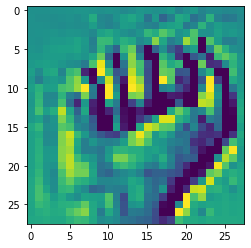

In [ ]:
xs= 1
print(y[xs])
imgplot = plt.imshow(X_train[xs])
plt.show()

Utilizamos one hot encoding para todas nuestras clases

In [ ]:
y_train= np.array(y_train)
y_test= np.array(y_test)
n_classes = 24
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (27455, 1)
Shape after one-hot encoding:  (27455, 24)


In [ ]:
Y_test.shape

(7172, 24)

Iniciamos el modelo

Configuración Tensorboard

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import datetime, os

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

Definimos la arquitectura de nuestra red convolucional

In [ ]:
#Start model Alexnet
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(36, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

#flatten output of conv
model.add(Flatten())

model.add(Dense(24))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=["acc"])
early_stop= EarlyStopping(monitor= "val_loss", patience= 4, restore_best_weights= True)

Entrenamos el modelo por 10 épocas

In [ ]:
cnn= model.fit(X_train, Y_train, batch_size=200, epochs=10, validation_data=(X_test, Y_test),callbacks=[early_stop])

Epoch 1/10
138/138 [==============================] - 70s 486ms/step - loss: 0.5837 - acc: 0.8487 - val_loss: 3.7592 - val_acc: 0.0721
Epoch 2/10
138/138 [==============================] - 73s 527ms/step - loss: 0.0274 - acc: 0.9987 - val_loss: 2.3815 - val_acc: 0.2817
Epoch 3/10
138/138 [==============================] - 77s 557ms/step - loss: 0.0089 - acc: 0.9999 - val_loss: 0.3367 - val_acc: 0.9120
Epoch 4/10
138/138 [==============================] - 78s 568ms/step - loss: 0.0048 - acc: 0.9999 - val_loss: 0.1488 - val_acc: 0.9584
Epoch 5/10
138/138 [==============================] - 78s 567ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.1231 - val_acc: 0.9643
Epoch 6/10
138/138 [==============================] - 80s 580ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1330 - val_acc: 0.9601
Epoch 7/10
138/138 [==============================] - 82s 593ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1297 - val_acc: 0.9668
Epoch 8/10
138/138 [==============================] - 8

Text(0.5, 1.0, 'Comportamiento de la perdida')

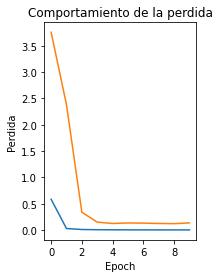

In [ ]:
plt.subplot(1,2,1)
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.ylabel("Perdida")
plt.xlabel("Epoch")
plt.title("Comportamiento de la perdida")

Text(0.5, 1.0, 'Comportamiento de la precisión')

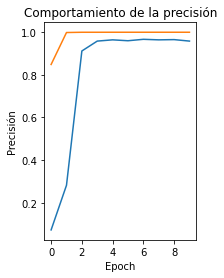

In [ ]:
plt.subplot(1,2,1)
plt.plot(cnn.history['val_acc'])
plt.plot(cnn.history['acc'])
plt.ylabel("Precisión")
plt.xlabel("Epoch")
plt.title("Comportamiento de la precisión")

Matriz de confusion:


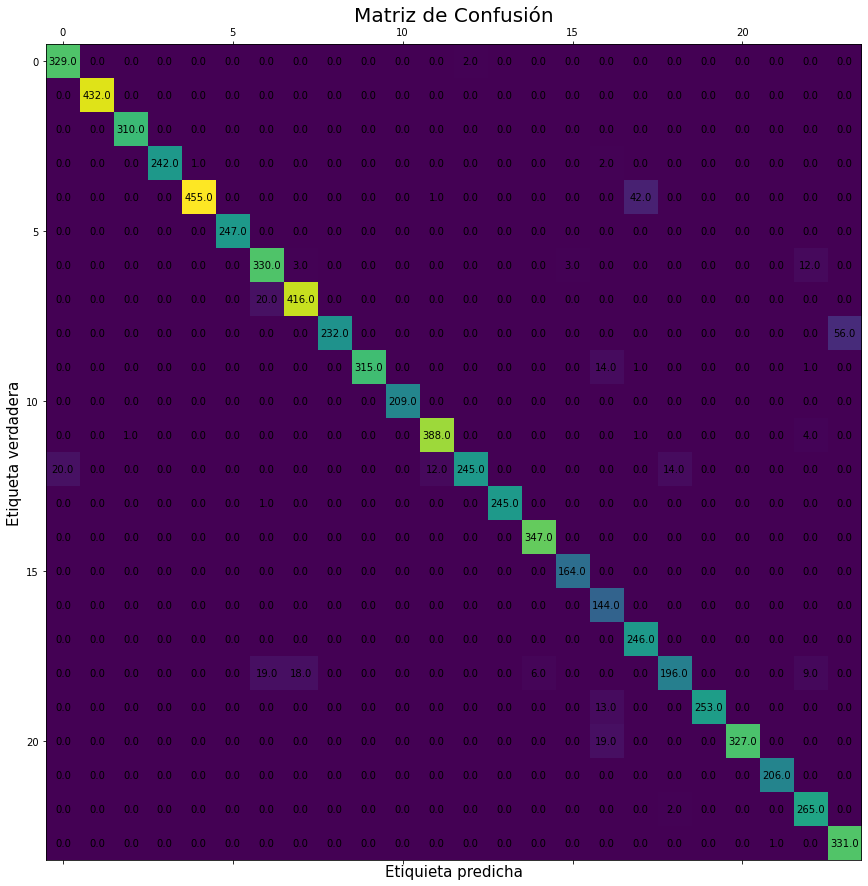

In [ ]:
from numpy import argmax
predictions= model.predict(X_test)
y_pred=[]
for i in range(len(predictions)):
    y_pred.append(argmax(predictions[i]))

y_ref= np.argmax(Y_test, axis= 1)
print('Matriz de confusion:')
cm= confusion_matrix(y_ref,  y_pred)
fig, ax= plt.subplots(figsize=(15,15))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize= 20)
plt.ylabel('Etiqueta verdadera', fontsize = 15)
plt.xlabel('Etiquieta predicha', fontsize= 15)
for(i,j), z in np.ndenumerate(cm):
  ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

## Conclusiones

La red convolucional tiene un muy buen desempeño y podemos verlo en las dos gráficas (asertividad y pérdida), en donde ambas lineas tienen el comportamiento esperado, es decir, las líneas del conjunto de validación y entrenamiento están muy cercanas y la de asertividad por su lado tiende a uno y la pérdida al cero.Ahora volteando a ver la mátriz de confusión podemos observar que efectivamente tiene un muy buen desempeño, solo en un par de letras tiene algunos fallos porque son muy pareceidas las señas, pero es incluso algo que podría pasarnos a nosotros como humanos.